In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
X = np.arange(-64, 64)
X = X.reshape(16, 8)
x = np.linspace(-10, 10, 1000)
X

array([[-64, -63, -62, -61, -60, -59, -58, -57],
       [-56, -55, -54, -53, -52, -51, -50, -49],
       [-48, -47, -46, -45, -44, -43, -42, -41],
       [-40, -39, -38, -37, -36, -35, -34, -33],
       [-32, -31, -30, -29, -28, -27, -26, -25],
       [-24, -23, -22, -21, -20, -19, -18, -17],
       [-16, -15, -14, -13, -12, -11, -10,  -9],
       [ -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4,   5,   6,   7],
       [  8,   9,  10,  11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63]])

In [3]:
def Plot(x, y, name, xlim = [-1.5, 1.5], ylim = [-1, 2], x_label='$x$', y_label='$y$'):
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], colors='black', linewidth=1)
    plt.vlines(x=0, ymin=ylim[0], ymax=ylim[1], colors='black', linewidth=1)

    plt.plot(x, y, label=name)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.grid()
    plt.legend()


# Activation functions

## ReLU

$$\text{ReLU}(x) = \max(0, x)$$

In [4]:
def relu(x: np.ndarray):
    return np.maximum(0, x)

In [5]:
relu(X)

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

### Plot

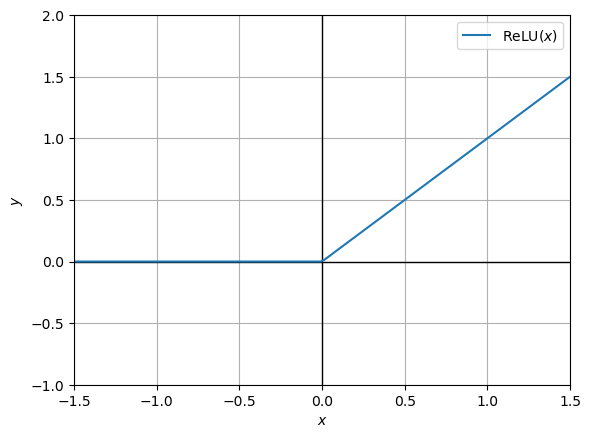

In [6]:
Plot(x, relu(x), 'ReLU$(x)$')

### Derivative

$ReLU'(z) = \begin{cases} 0, z < 0\\ 1, z > 0  \end{cases}$

In [7]:
def relu_derivative(x: np.ndarray):
    return (x >= 0).astype(np.float64)

In [8]:
relu_derivative(X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

### Plot

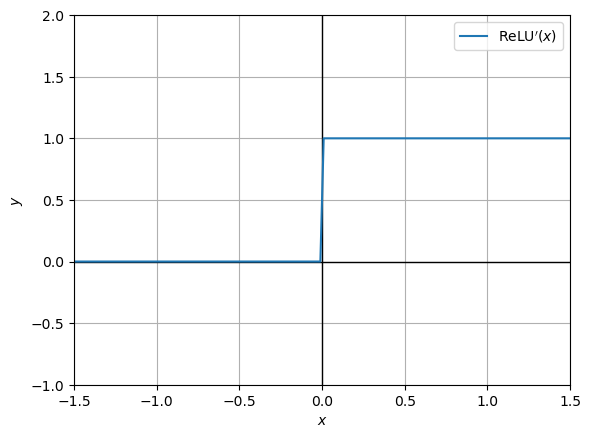

In [9]:
Plot(x, relu_derivative(x), "ReLU$'(x)$")

## ReLU6

$ReLU6(x) = min(max(0, x), 6)$

In [10]:
def relu6(z: np.ndarray):
    return np.minimum(np.maximum(0, z), 6)

In [11]:
relu6(X)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6]])

### Plot

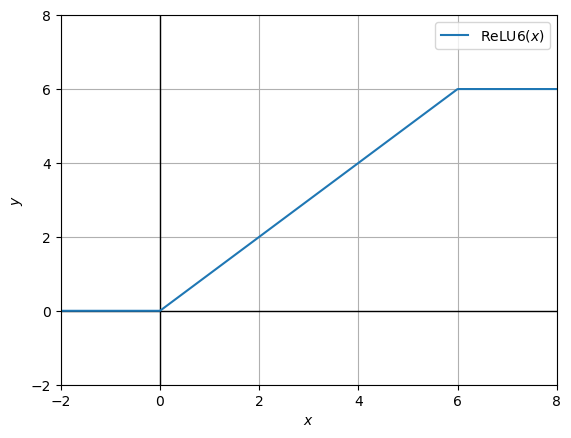

In [12]:
Plot(x, relu6(x), "ReLU6$(x)$", xlim=[-2, 8], ylim=[-2, 8])

### Derivative

In [13]:
def relu6_derivative(x: np.ndarray):
    return ((x >= 0) & (x <= 6)).astype(np.float64)

In [14]:
relu6_derivative(X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

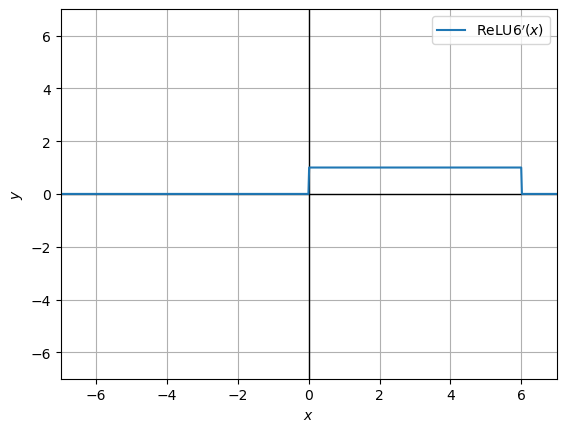

In [15]:
Plot(x, relu6_derivative(x), "ReLU6$'(x)$", xlim=[-7, 7], ylim=[-7, 7])

## SiLU

$$\text{SiLU}(x) = x \sigma (x)$$

In [16]:
def silu(x: np.ndarray):
    return x * 1 / (1 + np.exp(-x))

In [17]:
silu(X)

array([[-1.02643897e-26, -2.74655430e-26, -7.34740216e-26,
        -1.96501757e-25, -5.25390646e-25, -1.40435718e-24,
        -3.75273626e-24, -1.00251156e-23],
       [-2.67730001e-23, -7.14769784e-23, -1.90761943e-22,
        -5.08942043e-22, -1.35734512e-21, -3.61869182e-21,
        -9.64374924e-21, -2.56901398e-20],
       [-6.84078760e-20, -1.82077889e-19, -4.84408398e-19,
        -1.28813336e-18, -3.42369819e-18, -9.09506346e-18,
        -2.41479935e-17, -6.40781698e-17],
       [-1.69934170e-16, -4.50380743e-16, -1.19287046e-15,
        -3.15722762e-15, -8.35028219e-15, -2.20679087e-14,
        -5.82728867e-14, -1.53743243e-13],
       [-4.05253298e-13, -1.06716790e-12, -2.80728689e-12,
        -7.37663038e-12, -1.93603203e-11, -5.07472780e-11,
        -1.32836315e-10, -3.47198597e-10],
       [-9.06032291e-10, -2.36023232e-09, -6.13682980e-09,
        -1.59233769e-08, -4.12230724e-08, -1.06453132e-07,
        -2.74139631e-07, -7.03789383e-07],
       [-1.80056259e-06, -4.588533

### Plot

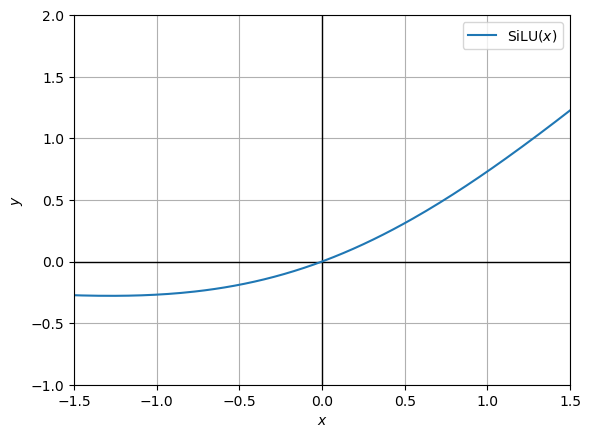

In [18]:
Plot(x, silu(x), "SiLU$(x)$")

### Derivative

$\text{SiLU}'(x) = \sigma (x) (1+x(1-\sigma (x)))$

In [19]:
def silu_derivative(x: np.ndarray):
    sigm = 1/(1+np.exp(-x))
    return sigm * (1 + x * (1 - sigm))

In [20]:
silu_derivative(X)

array([[-1.01040086e-26, -2.70295820e-26, -7.22889567e-26,
        -1.93280417e-25, -5.16634135e-25, -1.38055452e-24,
        -3.68803391e-24, -9.84923633e-24],
       [-2.62949109e-23, -7.01773970e-23, -1.87229314e-22,
        -4.99339363e-22, -1.33124233e-21, -3.54773708e-21,
        -9.45087426e-21, -2.51658512e-20],
       [-6.69827119e-20, -1.78203891e-19, -4.73877781e-19,
        -1.25950818e-18, -3.34588686e-18, -8.88355036e-18,
        -2.35730413e-17, -6.25152876e-17],
       [-1.65685816e-16, -4.38832519e-16, -1.16147913e-15,
        -3.07189715e-15, -8.11832991e-15, -2.14373970e-14,
        -5.65589782e-14, -1.49084357e-13],
       [-3.92589132e-13, -1.03274313e-12, -2.71371066e-12,
        -7.12226381e-12, -1.86688803e-11, -4.88677492e-11,
        -1.27727226e-10, -3.33310653e-10],
       [-8.68280945e-10, -2.25761352e-09, -5.85788299e-09,
        -1.51651208e-08, -3.91619187e-08, -1.00850335e-07,
        -2.58909648e-07, -6.62389978e-07],
       [-1.68802723e-06, -4.282629

### Plot

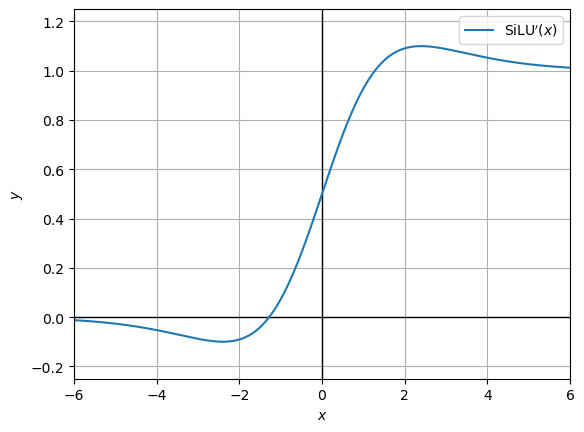

In [21]:
Plot(x, silu_derivative(x), "SiLU$'(x)$", xlim=[-6, 6], ylim=[-0.25, 1.25])

## GeLU

$$GeLU(x) = \frac{1}{2}x\left[1+erf\left(\frac{x}{\sqrt{2}}\right)\right] \approx 0.5x\left(1+\tanh\left(\sqrt{\frac{2}{\pi}}(x++0.044715x^3)\right)\right)$$

In [22]:
def gelu(x: np.ndarray):
    return x * 0.5 * (1.0 + torch.erf(torch.tensor(x) / np.sqrt(2.0))).numpy()

In [23]:
# def gelu_approx(x: np.ndarray):
#     return x / (1 + np.exp(-1.702*x))

In [24]:
def gelu_approx(x: np.ndarray):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x ** 3)))

In [25]:
gelu(X)

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.000000

In [26]:
gelu_approx(X)

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00, -0.000000

### Plot

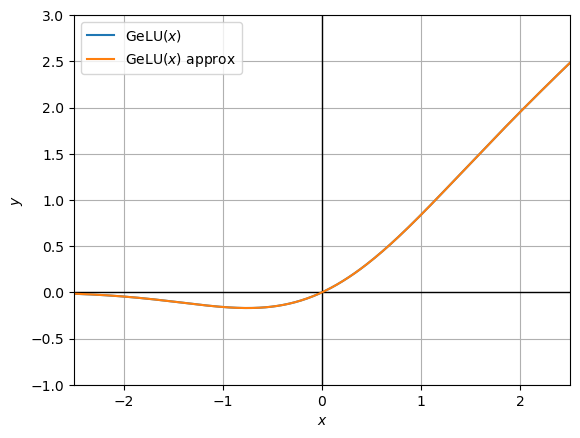

In [27]:
plt.plot(x, gelu(x), label="GeLU$(x)$")
Plot(x, gelu_approx(x), "GeLU$(x)$ approx", xlim=[-2.5, 2.5], ylim=[-1, 3])



### Derivative

In [28]:
def gelu_derivative(x):
    return 0.5 * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x / np.power(np.cosh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))), 2) * np.sqrt(2/np.pi) * (1 + 3 * 0.044715 * np.power(x, 2))

In [29]:
gelu_derivative(X)

C:\Users\user\AppData\Local\Temp\ipykernel_7076\1745457103.py:2: RuntimeWarning: overflow encountered in cosh
  return 0.5 * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x / np.power(np.cosh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))), 2) * np.sqrt(2/np.pi) * (1 + 3 * 0.044715 * np.power(x, 2))
C:\Users\user\AppData\Local\Temp\ipykernel_7076\1745457103.py:2: RuntimeWarning: overflow encountered in power
  return 0.5 * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3)))) + 0.5 * x / np.power(np.cosh(np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))), 2) * np.sqrt(2/np.pi) * (1 + 3 * 0.044715 * np.power(x, 2))


array([[ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        -5.77587371e-299, -2.94412060e-259, -2.84754153e-223,
        -8.01251416e-191, -1.00

### Plot

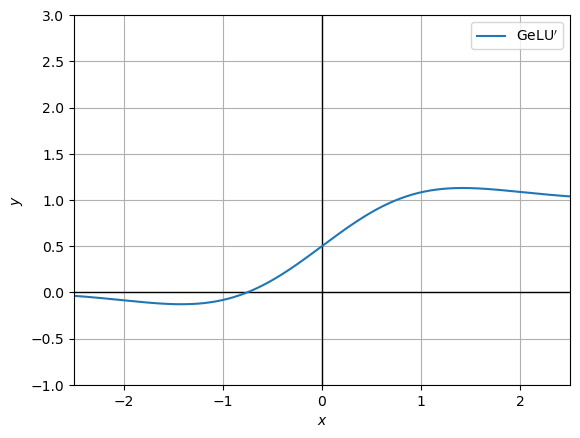

In [30]:
# plt.plot(x, gelu_approx(x), label="GeLU")
Plot(x, gelu_derivative(x), "GeLU$'$", xlim=[-2.5, 2.5], ylim=[-1, 3])

## Softplus

$$ \text{Softplus}: f(x) = \log(1 + e^x) $$

In [31]:
def softplus(x):
    return np.log(1 + np.exp(x))

In [32]:
softplus(X)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.22044605e-16, 6.66133815e-16, 1.77635684e-15, 4.66293670e-15],
       [1.26565425e-14, 3.44169138e-14, 9.34807787e-14, 2.54463117e-13,
        6.91446900e-13, 1.87960758e-12, 5.10902431e-12, 1.38880019e-11],
       [3.77513576e-11, 1.02618802e-10, 2.78946866e-10, 7.58256124e-10,
        2.06115369e-09, 5.60279643e-09, 1.52299796e-08, 4.13993764e-08],
       [1.12535168e-07, 3.05902274e-07, 8.31528373e-07, 2.26032685e-06,
        6.14419348e-06, 1.67015613e-05, 4.53988992e-05, 1.

### Plot

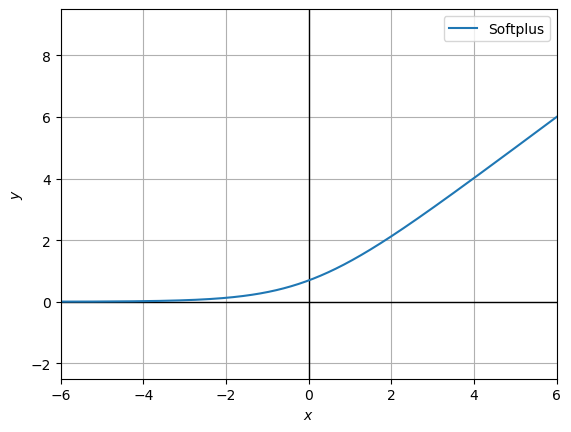

In [33]:
Plot(x, softplus(x), "Softplus", xlim=[-6, 6], ylim=[-2.5, 9.5])

### Derivative

$$ Softplus': f'(x) = \sigma(x)$$

In [34]:
def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))

In [35]:
softplus_derivative(X)

array([[1.60381089e-28, 4.35961000e-28, 1.18506486e-27, 3.22134029e-27,
        8.75651076e-27, 2.38026641e-26, 6.47023493e-26, 1.75879220e-25],
       [4.78089288e-25, 1.29958143e-24, 3.53262857e-24, 9.60268005e-24,
        2.61027907e-23, 7.09547416e-23, 1.92874985e-22, 5.24288566e-22],
       [1.42516408e-21, 3.87399763e-21, 1.05306174e-20, 2.86251858e-20,
        7.78113224e-20, 2.11513104e-19, 5.74952226e-19, 1.56288219e-18],
       [4.24835426e-18, 1.15482242e-17, 3.13913279e-17, 8.53304763e-17,
        2.31952283e-16, 6.30511676e-16, 1.71390843e-15, 4.65888615e-15],
       [1.26641655e-14, 3.44247711e-14, 9.35762297e-14, 2.54366565e-13,
        6.91440011e-13, 1.87952882e-12, 5.10908903e-12, 1.38879439e-11],
       [3.77513454e-11, 1.02618796e-10, 2.78946809e-10, 7.58256042e-10,
        2.06115362e-09, 5.60279641e-09, 1.52299795e-08, 4.13993755e-08],
       [1.12535162e-07, 3.05902227e-07, 8.31528028e-07, 2.26032430e-06,
        6.14417460e-06, 1.67014218e-05, 4.53978687e-05, 1.

### Plot

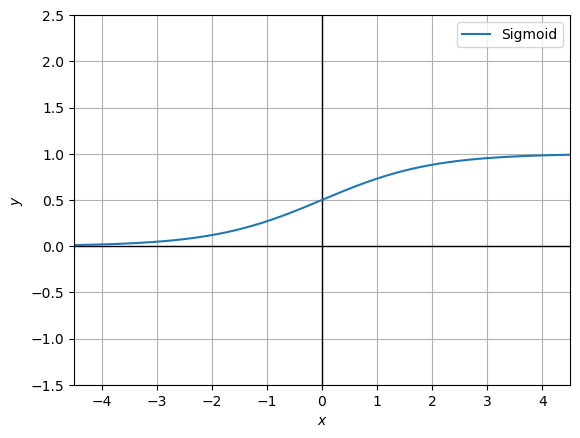

In [36]:
Plot(x, softplus_derivative(x), "Sigmoid", xlim=[-4.5, 4.5], ylim=[-1.5, 2.5])

# Loss Functions

## $\text{BCE}$

In [37]:
y1_bin = np.random.rand(32, 1000, 5)
y2_bin = np.round(np.random.rand(32, 1000, 5))

In [38]:
def BinaryCrossEntropy(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.clip(np.log(y_pred + 1e-7), -100, 100) + (1 - y_true) * np.clip(np.log(1-y_pred + 1e-7), -100, 100), axis=0)) / y_pred.shape[0]


In [39]:
BinaryCrossEntropy(y1_bin, y2_bin)

1.0015921755712247

In [40]:
torch.nn.functional.binary_cross_entropy(torch.tensor(y1_bin), torch.tensor(y2_bin))

tensor(1.0016, dtype=torch.float64)

### Plot

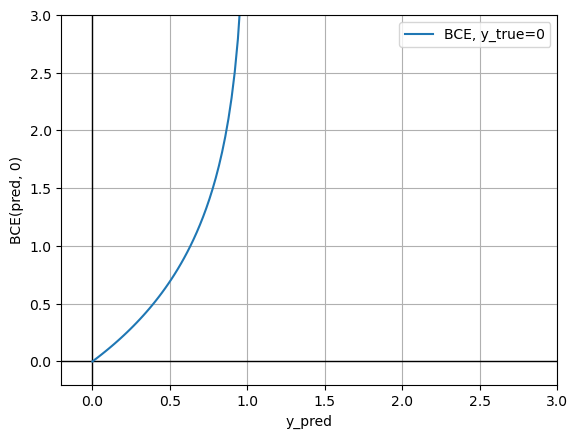

In [41]:
x = np.linspace(0, 1, 50)
y = [BinaryCrossEntropy(np.array([i]), np.array([0])) for i in x]

Plot(x, y, "BCE, y_true=0", xlim=[-0.2, 3], ylim=[-0.2, 3], x_label='y_pred', y_label='BCE(pred, 0)')

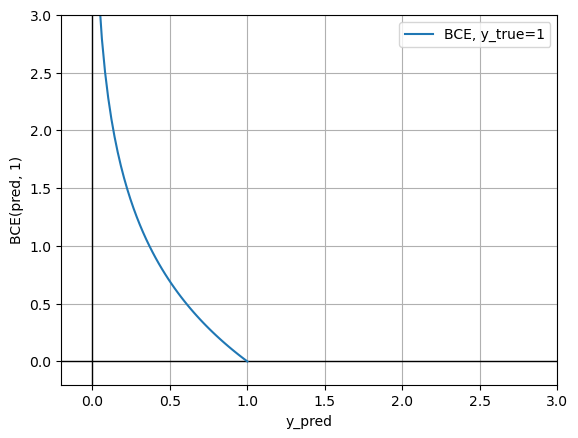

In [42]:
y = [BinaryCrossEntropy(np.array([i]), np.array([1])) for i in x]

Plot(x, y, "BCE, y_true=1", xlim=[-0.2, 3], ylim=[-0.2, 3], x_label='y_pred', y_label='BCE(pred, 1)')

## $\text{MSE}$

$$ \text{MSE}(y, \hat y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y_i) ^ 2$$

In [43]:
y1 = np.random.rand(8, 100, 150, 4) * 10 - 5
y2 = np.random.randn(8, 100, 150, 4) * 15 - 7.5

In [44]:
def mse(y_pred, y_true, reduction='mean'):
    if reduction == 'sum':
        return np.sum(np.mean((y_true - y_pred) * (y_true - y_pred), axis=0))
    return np.mean(np.mean((y_true - y_pred) * (y_true - y_pred), axis=0))

In [45]:
mse(y1, y2)

289.9375968281151

In [46]:
torch.nn.functional.mse_loss(torch.tensor(y1), torch.tensor(y2))

tensor(289.9376, dtype=torch.float64)

### Plot

### 2D

Text(0.5, 1.0, 'MSE($\\hat y$, $y$)')

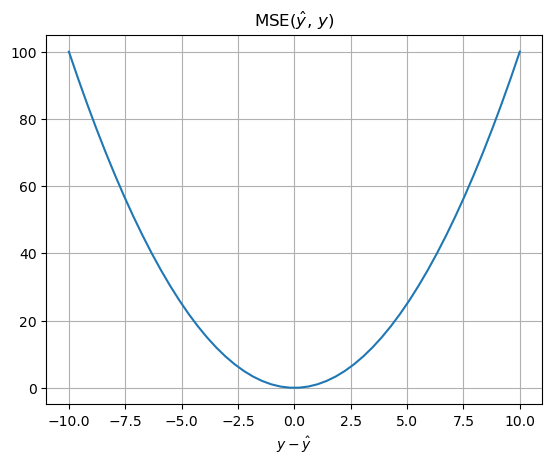

In [47]:
x = np.linspace(-10, 10)
plt.plot(x, x ** 2)
plt.grid()
plt.xlabel('$y-\hat y$')
plt.title('MSE($\hat y$, $y$)')

### 3D

Text(0.5, 0.92, '3D plot of MSE for ($\\hat y = kx+b$)')

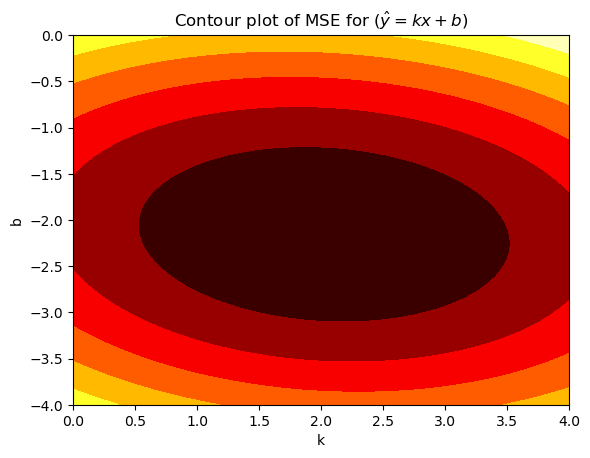

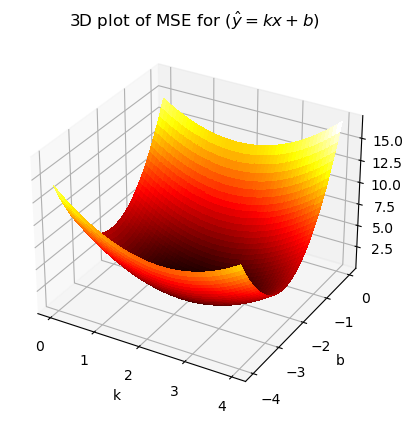

In [56]:
from matplotlib import cm

# Consider next simple linear regression model:
# y = b1 * x + b2 + epsilon
# Lets visualize a MSE loss function as MSE(b1, b2)

# y_cap = kx + b
y_cap = lambda k, b: k * x + b
# MSE(y_cap, y) = MSE(k, b)

k_points = np.linspace(0, 4, 50) 
b_points = np.linspace(-4, 0, 50)

# regressand
y = np.random.rand(50) * 10 - 7

# regressor
eps = np.random.rand(50)
eps = eps - eps.mean()
x = y / 2.0 + 1 + eps
# y = 2 * x - 2 + epsilon_1 => min: MSE(k, b) should be around (2, -2)

# contour plot of MSE
fig1, ax = plt.subplots()

K, B = np.meshgrid(k_points, b_points)

Z = np.array([[mse(y_cap(K[i, j], B[i, j]), y) for i in range(K.shape[0])] for j in range(K.shape[1])])

ax.set_xlabel('k')
ax.set_ylabel('b')
ax.contourf(K, B, Z, cmap=cm.hot, antialiased=False)
#ax.view_init(elev=90, azim=180)
ax.set_title('Contour plot of MSE for ($\hat y = kx+b$)')

# 3D plot of MAE
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_xlabel('k')
ax.set_ylabel('b')
ax.plot_surface(K, B, Z, cmap=cm.hot, linewidth=0, antialiased=False)
#ax.view_init(elev=25, azim=125)
ax.set_title('3D plot of MSE for ($\hat y = kx+b$)')


## $\text{MAE}$

$$ \text{MAE}(y, \hat y) = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat y_i|$$

In [57]:
def mae(y_pred, y_true, reduction='mean'):
    if reduction == 'sum':
        return np.sum(np.sum(np.abs(y_true - y_pred), axis=0))
    return np.mean(np.mean(np.abs(y_true - y_pred), axis=0))

In [58]:
mae(y1, y2)

13.631685082153052

In [59]:
torch.nn.functional.l1_loss(torch.tensor(y1), torch.tensor(y2), reduction='mean')

tensor(13.6317, dtype=torch.float64)

### Plot

Text(0.5, 1.0, 'MAE($\\hat y$, $y$)')

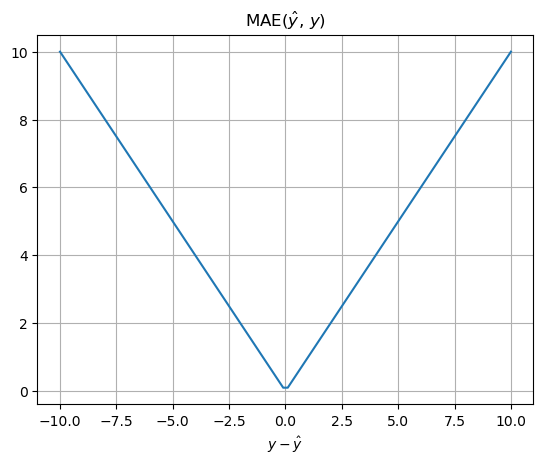

In [60]:
x = np.linspace(-10, 10, 100)
plt.plot(x, np.abs(x))
plt.grid()
plt.xlabel('$y-\hat y$')
plt.title('MAE($\hat y$, $y$)')

C:\Users\user\AppData\Local\Temp\ipykernel_7076\3952728314.py:33: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contourf(K, B, Z, cmap=cm.hot, linewidth=0, antialiased=False)


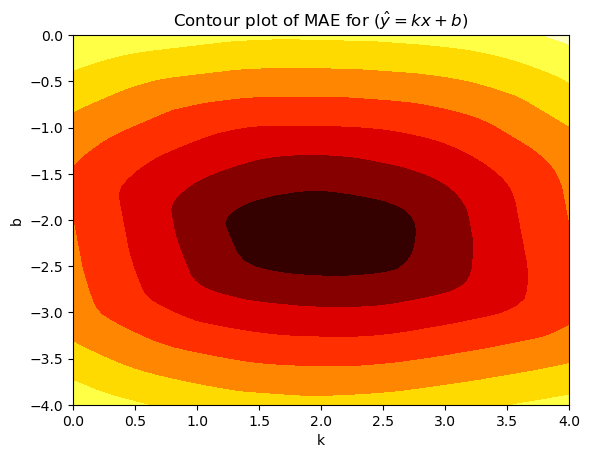

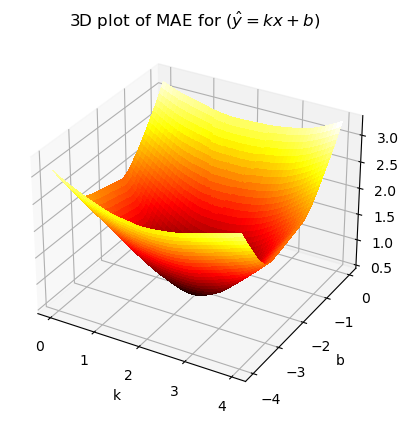

In [61]:
from matplotlib import cm

# Consider next simple linear regression model:
# y = b1 * x + b2 + epsilon
# Lets visualize a MAE loss function as MAE(b1, b2)

# y_cap = kx + b
y_cap = lambda k, b: k * x + b

# MSE(y_cap, y) = MSE(k, b)

k_points = np.linspace(0, 4, 50) 
b_points = np.linspace(-4, 0, 50)

# regressand
y = np.random.rand(50) * 10 - 7

# regressor
eps = np.random.rand(50)
eps = eps - eps.mean()
x = y / 2.0 + 1 + eps
# y = 2 * x - 2 + epsilon_1 => min: MAE(k, b) should be around (2, -2)

# contour plot of MAE
fig1, ax = plt.subplots()

K, B = np.meshgrid(k_points, b_points)

Z = np.array([[mae(y_cap(K[i, j], B[i, j]), y) for i in range(K.shape[0])] for j in range(K.shape[1])])

ax.set_xlabel('k')
ax.set_ylabel('b')
ax.contourf(K, B, Z, cmap=cm.hot, linewidth=0, antialiased=False)
#ax.view_init(elev=90, azim=180)
ax.set_title('Contour plot of MAE for ($\hat y = kx+b$)')

# 3D plot of MAE
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_xlabel('k')
ax.set_ylabel('b')
ax.plot_surface(K, B, Z, cmap=cm.hot, linewidth=0, antialiased=False)
#ax.view_init(elev=90, azim=180)
ax.set_title('3D plot of MAE for ($\hat y = kx+b$)')
plt.show()